# Starbucks Capstone Challenge

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
% matplotlib inline


In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Data Exploration and preprocessing

### Portfolio

This is the schema and exploration of portfolio.

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)


In [3]:
portfolio.shape

(10, 6)

In [4]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


**offer_type**

* BOGO - Buy one get one free. 
* discount - Discount available in certain period.
* informational - Information about the products

**Speculation of offer_type**

* BOGO - Difficulty and reward are always similar. And, there are 2 types of duration.
* discount - Reward is always smaller than difficulty.
* informational - Reward is zero. Distribution channel by social is shorter duration than others.  

### Data Preprocessing

- Rename id as offer id.
- Convert channels data as one-hot encoding.
- Convert offer_type as one-hot encoding.
- Convert duration from date to hours.

In [5]:
portfolio = portfolio.rename(columns={"id": "offer id"})

In [6]:
channels =pd.DataFrame(columns = ['email', 'mobile', 'social', 'web'])
for i  in range(len(portfolio['channels'])):
    C = pd.DataFrame(pd.get_dummies(portfolio['channels'][i]).sum(axis=0)).T
    channels = pd.concat([channels, C])

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [7]:
channels = channels.reset_index()

In [8]:
portfolio = portfolio.drop('channels',axis = 1)

In [9]:
portfolio = portfolio.join(channels)

In [10]:
print(portfolio)

   difficulty  duration                          offer id     offer_type  \
0          10         7  ae264e3637204a6fb9bb56bc8210ddfd           bogo   
1          10         5  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo   
2           0         4  3f207df678b143eea3cee63160fa8bed  informational   
3           5         7  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo   
4          20        10  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount   
5           7         7  2298d6c36e964ae4a3e7e9706d1fb8c2       discount   
6          10        10  fafdcd668e3743c1bb461111dcafc2a4       discount   
7           0         3  5a8bc65990b245e5a138643cd4eb9837  informational   
8           5         5  f19421c1d4aa40978ebb69ca19b0e20d           bogo   
9          10         7  2906b810c7d4411798c6938adc9daaa5       discount   

   reward  index email mobile social  web  
0      10      0     1      1      1  NaN  
1      10      0     1      1      1    1  
2       0      0     1      1  

In [11]:
portfolio = pd.get_dummies(portfolio, columns=['offer_type'])

In [12]:
portfolio.fillna(0, inplace = True)

In [13]:
portfolio = portfolio.drop('index', axis = 1)

In [14]:
portfolio['duration'] = portfolio['duration']*24

In [15]:
portfolio

,difficulty,duration,offer id,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational
0,10,168,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,1,0,0
1,10,120,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0
2,0,96,3f207df678b143eea3cee63160fa8bed,0,1,1,0,1,0,0,1
3,5,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,1,1,0,0
4,20,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0,1,0
5,7,168,2298d6c36e964ae4a3e7e9706d1fb8c2,3,1,1,1,1,0,1,0
6,10,240,fafdcd668e3743c1bb461111dcafc2a4,2,1,1,1,1,0,1,0
7,0,72,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,0,0,1
8,5,120,f19421c1d4aa40978ebb69ca19b0e20d,5,1,1,1,1,1,0,0
9,10,168,2906b810c7d4411798c6938adc9daaa5,2,1,1,0,1,0,1,0


### Profile

This is the schema and exploration of profile.

**profile.json**

* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income


In [16]:
profile.shape

(17000, 5)

In [17]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


### Data Preprocessing

- Drop Nan data.
- Separate datetime for month and year.
- Convert gender as one-hot encoding.

In [18]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [19]:
profile_drop = profile.dropna()

In [20]:
profile_drop = profile_drop.rename(columns={"id": "person"})

In [21]:
month = profile_drop['became_member_on']//100%100
year = profile_drop['became_member_on']//10000

In [22]:
profile = pd.concat([profile_drop, month, year],axis = 1)

In [23]:
profile.columns = ['age', 'became_member_on', 'gender', 'person', 'income', 'month', 'year']

In [24]:
profile = profile.drop('became_member_on',axis = 1)

In [25]:
profile = pd.get_dummies(profile, columns=['gender'])

In [26]:
profile.head()

,age,person,income,month,year,gender_F,gender_M,gender_O
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0
5,68,e2127556f4f64592b11af22de27a7932,70000.0,4,2018,0,1,0
8,65,389bc3fa690240e798340f5a15918d5c,53000.0,2,2018,0,1,0
12,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,11,2017,0,1,0


### Transcript

This is the schema and exploration of transcript.

**transcript.json**

* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


In [27]:
transcript.shape

(306534, 4)

In [28]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


### Data Preprocessing

- Convert value data.
- Fill Nan.

In [29]:
transcript = transcript.join(transcript['value'].apply(pd.Series))

In [30]:
transcript["offer"] = np.where(transcript["offer id"].isnull() & transcript["offer_id"].notnull(), transcript['offer_id'], transcript['offer id'])
transcript = transcript.drop(['value','offer id', 'offer_id'],axis = 1)
transcript = transcript.rename(columns={"offer": "offer id"})

In [31]:
transcipt = transcript.fillna(0, inplace = True)

In [32]:
transcript.head()

,event,person,time,amount,reward,offer id
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0.0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,0.0,0.0,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,0.0,0.0,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,0.0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0


## Merge data

In [33]:
data = pd.merge(profile, transcript, on = 'person')

In [34]:
data.head()

,age,person,income,month,year,gender_F,gender_M,gender_O,event,time,amount,reward,offer id
0,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,18,21.51,0.0,0
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,144,32.28,0.0,0
2,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,offer received,408,0.00,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,offer received,504,0.00,0.0,3f207df678b143eea3cee63160fa8bed
4,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,528,23.22,0.0,0


In [35]:
data = pd.merge(data, portfolio, on = 'offer id', how='outer', indicator = True)

In [36]:
data = data.drop("_merge",axis = 1)

In [37]:
data.head()

,age,person,income,month,year,gender_F,gender_M,gender_O,event,time,...,difficulty,duration,reward_y,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational
0,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0,transaction,132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0,transaction,144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data = data.rename(columns={"reward_x": "transaction_amount", "reward_y":"reward"})

In [39]:
data = data.fillna(0)

In [40]:
data.head()

,age,person,income,month,year,gender_F,gender_M,gender_O,event,time,...,difficulty,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational
0,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0,transaction,132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0,transaction,144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
def make_csv(data, filename, data_dir):
    
    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    data.to_csv(data_dir+'/'+filename, index=False)
    
    print('Path created: '+str(data_dir)+'/'+str(filename))

In [42]:
make_csv(data, "processed_data.csv", 'processed_data')

Path created: processed_data/processed_data.csv


## Label the data

**Confirm whether offer successfully received, viewed and completed.**

#### Informational offer

In [43]:
data = pd.read_csv('processed_data/processed_data.csv')

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
data['label'] = 0

In [45]:
data.head()

,age,person,income,month,year,gender_F,gender_M,gender_O,event,time,...,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,label
0,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017,1,0,0,transaction,528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0,transaction,132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0,transaction,144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


**Label successful offer**

1. If received offer is completed in a set duration, label success as 1 in BOGO datasets.
2.  If received offer is completed in a set duration, label success as 1 in discount datasets.
3. If received offer is viewed in a set duration, label success as 1 in informational offer datasets.

In [46]:
def label_bogo_offer(data):
    output = pd.DataFrame()
    data = data.sort_values(by=["person", "time"], ascending=True).query('offer_type_discount == 1')
    for i, name in enumerate(data['person'].unique()):
        bogo_data = data.query('person == @name and (event == "offer completed" or event == "offer received")').copy()
        completed = bogo_data.query('event == "offer completed"')["time"]
        received = bogo_data.query('event == "offer received"')["time"]
        duration = bogo_data.query('event == "offer received"')["duration"]
        index_memo = []
        for i  in range(len(received)):
            for j in range(len(completed)):
                if (completed.iloc[j] - received.iloc[i] < duration.iloc[j]) and (completed.iloc[j] - received.iloc[i] >= 0):
                    index_memo.append(duration.index[i])
        bogo_data.loc[index_memo,'label']=1
        output= pd.concat([output, bogo_data], axis = 0)
    return output

In [47]:
def label_discount_offer(data):
    output = pd.DataFrame()
    data = data.sort_values(by=["person", "time"], ascending=True).query('offer_type_discount == 1')
    for i, name in enumerate(data['person'].unique()):
        discount_data = data.query('person == @name and (event == "offer completed" or event == "offer received")').copy()
        completed = discount_data.query('event == "offer completed"')["time"]
        received = discount_data.query('event == "offer received"')["time"]
        duration = discount_data.query('event == "offer received"')["duration"]
        index_memo = []
        for i  in range(len(received)):
            for j in range(len(completed)):
                if (completed.iloc[j] - received.iloc[i] < duration.iloc[j]) and (completed.iloc[j] - received.iloc[i] >= 0):
                    index_memo.append(duration.index[i])
        discount_data.loc[index_memo,'label']=1
        output= pd.concat([output, discount_data], axis = 0)
    return output

In [48]:
def label_informational_offer(data):
    output = pd.DataFrame()
    data = data.sort_values(by=["person", "time"], ascending=True).query('offer_type_informational == 1')
    for i, name in enumerate(data['person'].unique()):
        info_data = data.query('person == @name').copy()
        viewed = info_data.query('event == "offer viewed"')["time"].values
        received = info_data.query('event == "offer received"')["time"].values
        if len(viewed) == len(received):
            diff = viewed - received
            diff_term = np.repeat(diff, 2)
            info_data.loc[(info_data["duration"]>diff_term),'label'] = 1
        output= pd.concat([output, info_data], axis = 0)
    return output

In [ ]:
bogo_data = label_bogo_offer(data)
print(bogo_data)
make_csv(bogo_data, "bogo_data.csv", 'processed_data')
discount_data = label_discount_offer(data)
print(discount_data)
make_csv(discount_data, "discount_data.csv", 'processed_data')
info_data = label_informational_offer(data)
print(info_data)
make_csv(info_data, "info_data.csv", 'processed_data')

In [2]:
bogo_data =  pd.read_csv('processed_data/bogo_data.csv')
discount_data = pd.read_csv('processed_data/discount_data.csv')
info_data = pd.read_csv('processed_data/info_data.csv')

In [3]:
bogo_data.head()

,age,person,income,month,year,gender_F,gender_M,gender_O,event,time,...,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,label
0,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer received,504,...,240.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1
1,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer completed,528,...,240.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
2,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer received,576,...,168.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer completed,576,...,168.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,40,0011e0d4e6b944f998e987f904e8c1e5,57000.0,1,2018,0,0,1,offer received,168,...,168.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1


In [4]:
discount_data.head()

,age,person,income,month,year,gender_F,gender_M,gender_O,event,time,...,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,label
0,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer received,504,...,240.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1
1,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer completed,528,...,240.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
2,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer received,576,...,168.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer completed,576,...,168.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,40,0011e0d4e6b944f998e987f904e8c1e5,57000.0,1,2018,0,0,1,offer received,168,...,168.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1


In [5]:
info_data.head()

,age,person,income,month,year,gender_F,gender_M,gender_O,event,time,...,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,label
0,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer received,168,...,72.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1
1,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer viewed,192,...,72.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1
2,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer received,336,...,96.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
3,33,0009655768c64bdeb2e877511632db8f,72000.0,4,2017,0,1,0,offer viewed,372,...,96.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
4,40,0011e0d4e6b944f998e987f904e8c1e5,57000.0,1,2018,0,0,1,offer received,0,...,96.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1


**Merge received offer condition data from each datasets**

In [6]:
bogo = bogo_data.query('event == "offer received"')
discount = discount_data.query('event == "offer received"')
info = info_data.query('event == "offer received"')

In [7]:
processed_data = pd.concat([bogo, discount, info])

# Summarize Data

**Check the column name and one of dataset**

In [8]:
processed_data.columns

Index(['age', 'person', 'income', 'month', 'year', 'gender_F', 'gender_M',
       'gender_O', 'event', 'time', 'amount', 'transaction_amount', 'offer id',
       'difficulty', 'duration', 'reward', 'email', 'mobile', 'social', 'web',
       'offer_type_bogo', 'offer_type_discount', 'offer_type_informational',
       'label'],
      dtype='object')

In [9]:
processed_data.iloc[0]

age                                                       33
person                      0009655768c64bdeb2e877511632db8f
income                                                 72000
month                                                      4
year                                                    2017
gender_F                                                   0
gender_M                                                   1
gender_O                                                   0
event                                         offer received
time                                                     504
amount                                                     0
transaction_amount                                         0
offer id                    fafdcd668e3743c1bb461111dcafc2a4
difficulty                                                10
duration                                                 240
reward                                                     2
email                   

**Confirm number of attributes and instances in data**

In [10]:
processed_data.shape

(66628, 24)

**Confirm data distribution of label in dataset**

In [11]:
processed_data.groupby('label')['label'].count()

label
0    25019
1    41609
Name: label, dtype: int64

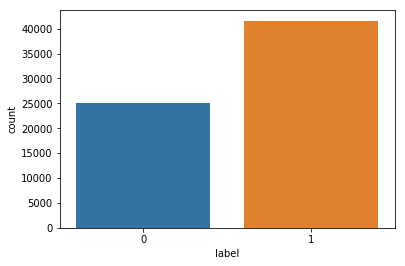

In [12]:
sns.countplot(x="label", data=processed_data)

This graph shows inequal distribution of labeled data

**Depict each attribute's five-number summary**

In [63]:
processed_data['age'].describe()

count    66628.000000
mean        54.360449
std         17.400203
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

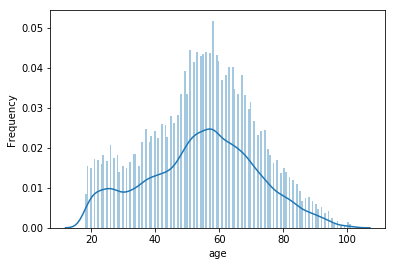

In [24]:
sns.distplot(processed_data['age'], bins= 150)
plt.ylabel('Frequency')

I do care about a small bump around age 20-30, but this shape is close to gaussian distribuiton.

In [64]:
processed_data['income'].describe()

count     66628.000000
mean      65329.411058
std       21560.080690
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       79000.000000
max      120000.000000
Name: income, dtype: float64

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

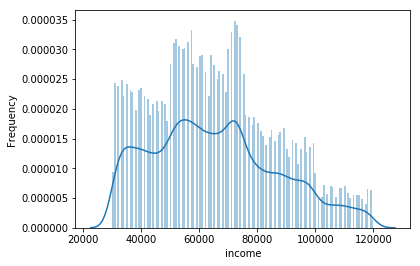

In [25]:
sns.distplot(processed_data['income'], bins=150)
plt.ylabel('Frequency')

Income distribution looks skewed.

In [65]:
processed_data['month'].describe()

count    66628.000000
mean         6.687699
std          3.490035
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Count')

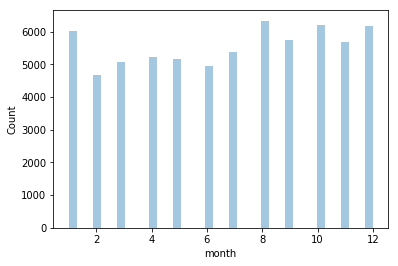

In [15]:
sns.distplot(processed_data['month'], kde=False)
plt.ylabel('Count')

Customer action's number in each month is almost equal in every month.

In [66]:
processed_data['year'].describe()

count    66628.000000
mean      2016.626298
std          1.199846
min       2013.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2018.000000
Name: year, dtype: float64

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Count')

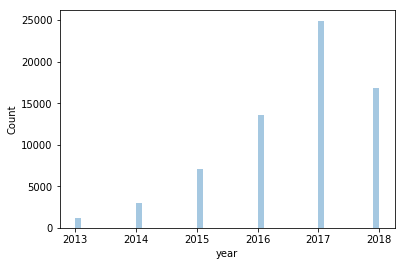

In [16]:
sns.distplot(processed_data['year'], kde=False)
plt.ylabel('Count')

Number of registration of mobile app seems increasing since 2013.

In [67]:
processed_data['time'].describe()

count    66628.000000
mean       332.440415
std        196.528837
min          0.000000
25%        168.000000
50%        408.000000
75%        504.000000
max        576.000000
Name: time, dtype: float64

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Count')

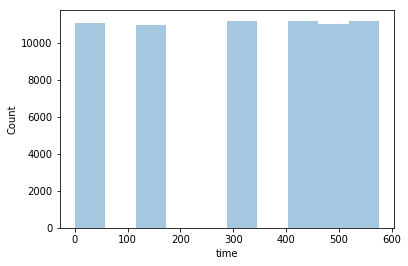

In [17]:
sns.distplot(processed_data['time'], bins = 10, kde=False)
plt.ylabel('Count')

The distribution of time shows a discrete pattern, it may distribute uniformly.

In [68]:
processed_data['duration'].describe()

count    66628.000000
mean       180.148046
std         58.060654
min         72.000000
25%        168.000000
50%        168.000000
75%        240.000000
max        240.000000
Name: duration, dtype: float64

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Count')

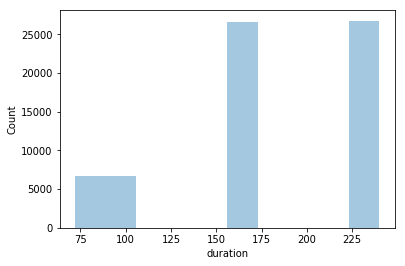

In [18]:
sns.distplot(processed_data['duration'], bins = 10, kde=False)
plt.ylabel('Count')

Duration of offer shows 4 general pattern.

In [69]:
processed_data['reward'].describe()

count    66628.000000
mean         2.406226
std          1.627981
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: reward, dtype: float64

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Count')

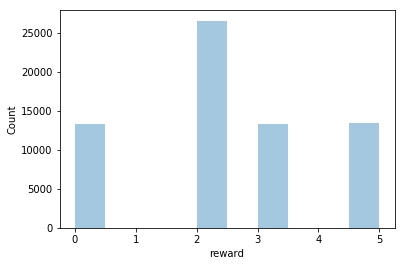

In [19]:
sns.distplot(processed_data['reward'], bins=10, kde=False)
plt.ylabel('Count')

Reward of offer also shows 4 general pattern.

# Standardization and Data Preprocessing 

**Drop string data for machine learning training.**

In [26]:
processed_data = processed_data.drop(['person', 'event', 'amount', 'transaction_amount', 'offer id'], axis = 1)

In [27]:
processed_data.head()

,age,income,month,year,gender_F,gender_M,gender_O,time,difficulty,duration,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,label
0,33,72000.0,4,2017,0,1,0,504,10.0,240.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1
2,33,72000.0,4,2017,0,1,0,576,10.0,168.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,40,57000.0,1,2018,0,0,1,168,7.0,168.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1
6,40,57000.0,1,2018,0,0,1,408,20.0,240.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
8,59,90000.0,3,2016,1,0,0,0,10.0,240.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1


In [28]:
processed_data.shape

(66628, 19)

**Try standardization.**

In [29]:
std_columns = ['age', 'income', 'month', 'year', 'time', 'difficulty', 'duration', 'reward']

In [30]:
std_processed_data = processed_data.copy()
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(std_processed_data[std_columns]), columns = std_columns)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
scaled_data.head()

,age,income,month,year,time,difficulty,duration,reward
0,-1.227607,0.309398,-0.770112,0.311461,0.872955,0.089362,1.030860,-0.249529
1,-1.227607,0.309398,-0.770112,0.311461,1.239316,0.089362,-0.209232,-0.249529
2,-0.825310,-0.386338,-1.629709,1.144907,-0.836730,-0.375674,-0.209232,0.364733
3,-0.825310,-0.386338,-1.629709,1.144907,0.384474,1.639482,1.030860,1.593258
4,0.266640,1.144280,-1.056645,-0.521986,-1.691573,0.089362,1.030860,-0.249529


In [32]:
scaled_data.shape

(66628, 8)

In [33]:
drop_data = processed_data.drop(std_columns, axis=1).reset_index()

In [34]:
scaled_data = pd.concat([scaled_data, drop_data], axis=1)

In [35]:
scaled_data = scaled_data.drop('index',axis =1)

In [36]:
scaled_data.head()

,age,income,month,year,time,difficulty,duration,reward,gender_F,gender_M,gender_O,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,label
0,-1.227607,0.309398,-0.770112,0.311461,0.872955,0.089362,1.030860,-0.249529,0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1
1,-1.227607,0.309398,-0.770112,0.311461,1.239316,0.089362,-0.209232,-0.249529,0,1,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
2,-0.825310,-0.386338,-1.629709,1.144907,-0.836730,-0.375674,-0.209232,0.364733,0,0,1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1
3,-0.825310,-0.386338,-1.629709,1.144907,0.384474,1.639482,1.030860,1.593258,0,0,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,0.266640,1.144280,-1.056645,-0.521986,-1.691573,0.089362,1.030860,-0.249529,1,0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1


**Save the mean and variance of standardization.**

In [37]:
print(std_columns)
print(scaler.mean_)
print(scaler.var_)
std_scaler = pd.concat([pd.DataFrame(scaler.mean_).T, pd.DataFrame(scaler.var_).T], axis = 0)
std_scaler.columns = std_columns
std_scaler.index = ['mean','var']
std_scaler.to_csv('ML_data/std.csv', index=False, header=False)
std_scaler.head()

['age', 'income', 'month', 'year', 'time', 'difficulty', 'duration', 'reward']
[5.43604491e+01 6.53294111e+04 6.68769887e+00 2.01662630e+03
 3.32440415e+02 9.42351564e+00 1.80148046e+02 2.40622561e+00]
[3.02762524e+02 4.64830103e+08 1.21801591e+01 1.43960798e+00
 3.86230040e+04 4.16168463e+01 3.37098895e+03 2.65028363e+00]


,age,income,month,year,time,difficulty,duration,reward
mean,54.360449,6.532941e+04,6.687699,2016.626298,332.440415,9.423516,180.148046,2.406226
var,302.762524,4.648301e+08,12.180159,1.439608,38623.003969,41.616846,3370.988949,2.650284


# Pairwise Scatter Plot

**Plot pairwise scatter plot to see correlation of attributes**

In [38]:
plot_data = scaled_data[['age', 'income', 'month', 'year', 'time', 'difficulty', 'duration', 'reward']]

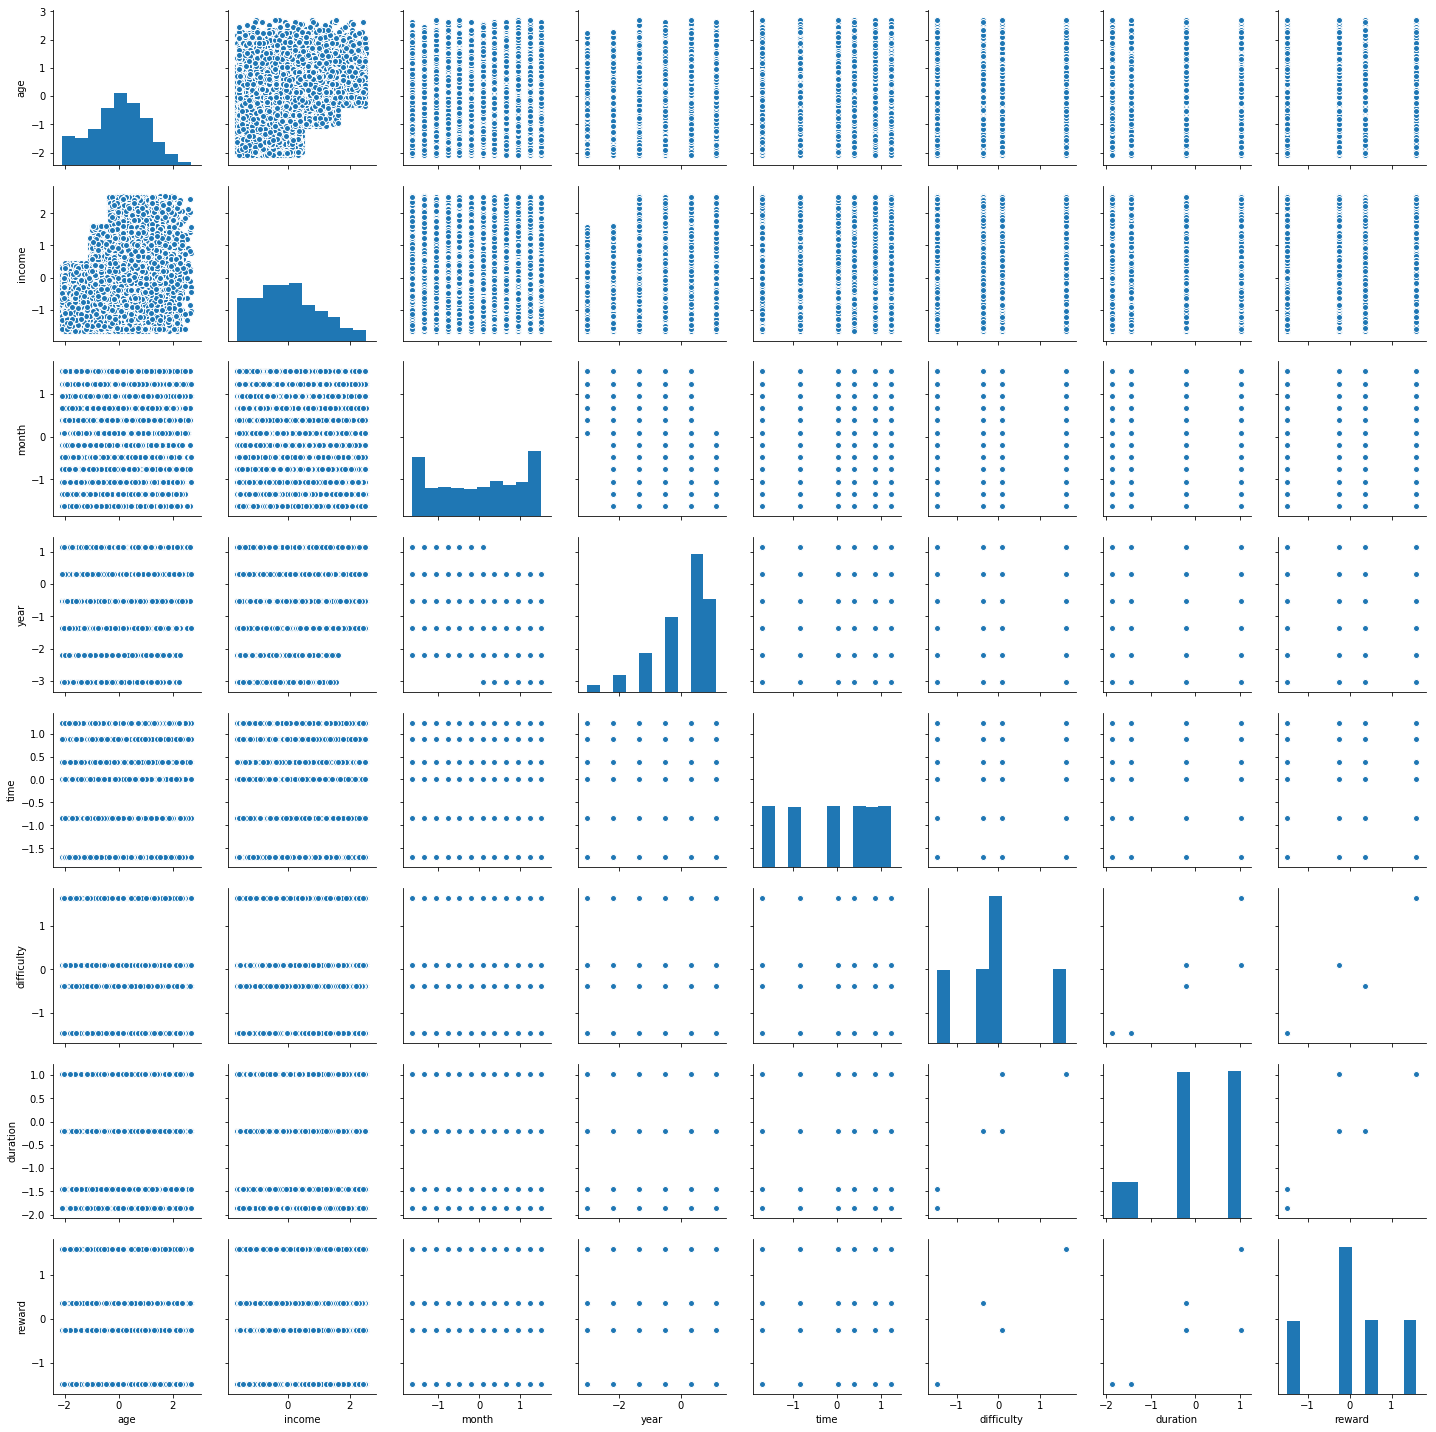

In [39]:
sns.pairplot(plot_data)

In [40]:
plot_offer_data = scaled_data[['difficulty', 'duration', 'reward']]

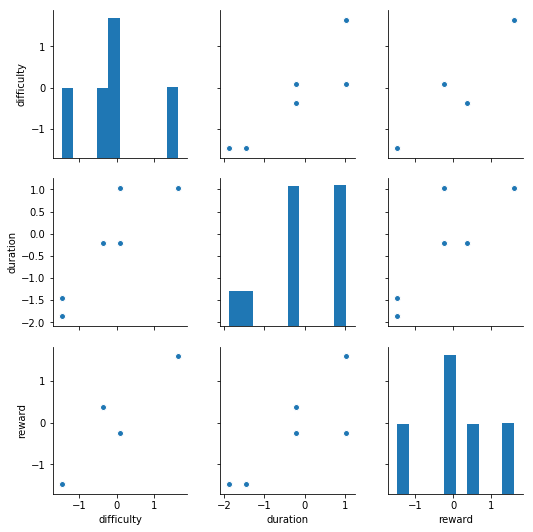

In [41]:
sns.pairplot(plot_offer_data)

Offer difficulty, duration and reward have correlation each other, but others do not.

# Split dataset to training, validation and test dataset.

There is an imbalance in datasets, but I will leave it to capture original problem of data.

https://machinelearningmastery.com/what-is-imbalanced-classification/#:~:text=Imbalanced%20classification%20refers%20to%20a,is%20instead%20biased%20or%20skewed.

In [121]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(scaled_data.iloc[:,:-1], scaled_data.iloc[:,-1], test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

train_data = pd.concat([pd.DataFrame(train_y), pd.DataFrame(train_x)],axis = 1)
test_data = pd.concat([pd.DataFrame(test_y), pd.DataFrame(test_x)],axis = 1)
val_data = pd.concat([pd.DataFrame(val_y), pd.DataFrame(val_x)],axis = 1)

In [122]:
columns = range(train_data.shape[1])
train_data.columns = columns
test_data.columns = columns
val_data.columns = columns

**Save dataset**

In [84]:
train_data.to_csv('ML_data/train.csv', index=False, header=False) 
test_data.to_csv('ML_data/test.csv', index=False, header=False)
val_data.to_csv('ML_data/val.csv', index=False, header=False)

In [123]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
41231,1,0.439053,0.494927,-0.770112,-0.521986,-1.691573,0.089362,1.030860,-0.249529,1,0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
45520,1,-0.595426,0.541310,-1.629709,1.144907,-1.691573,0.089362,1.030860,-0.249529,0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
51143,1,0.209169,-0.711014,0.662549,-0.521986,-1.691573,1.639482,1.030860,1.593258,0,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
18845,0,-0.078186,0.263015,-0.770112,1.144907,0.384474,1.639482,1.030860,1.593258,0,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
27177,1,2.220655,-1.406750,0.662549,0.311461,0.872955,0.089362,-0.209232,-0.249529,0,1,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [124]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
35180,1,0.553995,-0.293573,0.949081,0.311461,-1.691573,0.089362,1.03086,-0.249529,1,0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
13361,1,0.783879,0.402162,0.662549,0.311461,0.872955,1.639482,1.03086,1.593258,1,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
11540,1,0.324111,1.190663,0.376017,-1.355433,1.239316,0.089362,1.03086,-0.249529,0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
9728,0,1.703415,0.031104,-0.483580,-1.355433,-0.836730,1.639482,1.03086,1.593258,0,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
20825,1,-0.193128,0.494927,0.089484,0.311461,-1.691573,0.089362,1.03086,-0.249529,1,0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [125]:
val_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
5460,1,1.645944,2.396604,0.949081,-0.521986,0.872955,0.089362,1.030860,-0.249529,1,0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
34943,1,-0.710368,-1.499515,0.089484,1.144907,0.872955,-0.375674,-0.209232,0.364733,1,0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
11955,1,0.266640,0.355780,0.089484,-1.355433,0.872955,0.089362,-0.209232,-0.249529,0,1,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
30881,1,1.071234,-0.339955,-0.483580,-0.521986,-0.836730,0.089362,1.030860,-0.249529,0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
15299,1,-0.135657,1.468957,-0.770112,1.144907,-1.691573,0.089362,-0.209232,-0.249529,1,0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
